<a href="https://colab.research.google.com/github/mukheshbabu/machine-learning/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
### Generating the Dataset

from sklearn.datasets import make_classification

X, y = make_classification(
    n_features = 6,
    n_classes = 3,
    n_samples = 800,
    n_informative = 2,
    random_state = 1,
    n_clusters_per_class = 1,
)

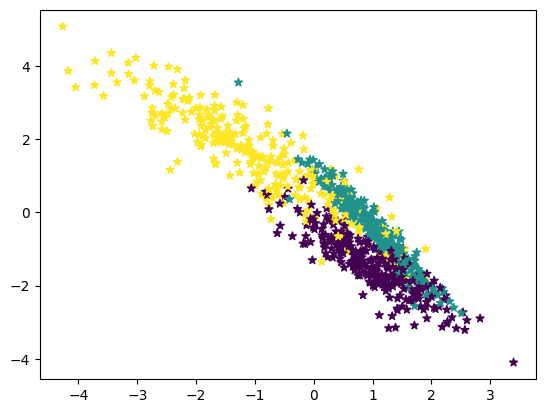

In [12]:
# Visualize the dataset

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

In [13]:
# Train Split Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)

In [17]:
### Model Building and Training

from sklearn.naive_bayes import GaussianNB

# Buils a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict output
predicted = model.predict([X_test[6]])

print("Actual Value:", y_test[6])
print("Predicted Value:", predicted[0])

Actual Value: 0
Predicted Value: 0


In [18]:
### Model Evaluation

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracy:", accuracy)
print('F1 Score:', f1)

Accuracy: 0.8484848484848485
F1 Score: 0.8491119695890328


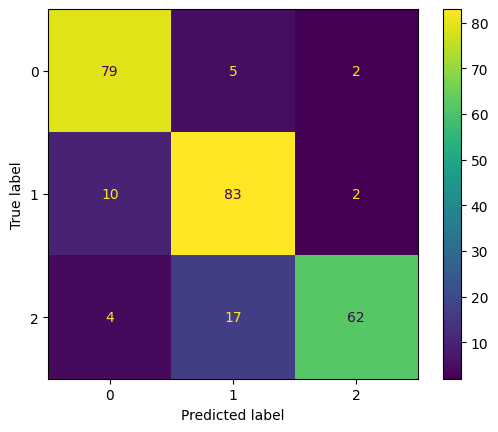

In [20]:
### Visualize the Confusion Matrix

labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()

In [49]:
### Naive Bayes Classifier with Loan Dataset

# Data Loading
import pandas as pd
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'debt_consolidation'),
  Text(1, 0, 'credit_card'),
  Text(2, 0, 'all_other'),
  Text(3, 0, 'home_improvement'),
  Text(4, 0, 'small_business'),
  Text(5, 0, 'major_purchase'),
  Text(6, 0, 'educational')])

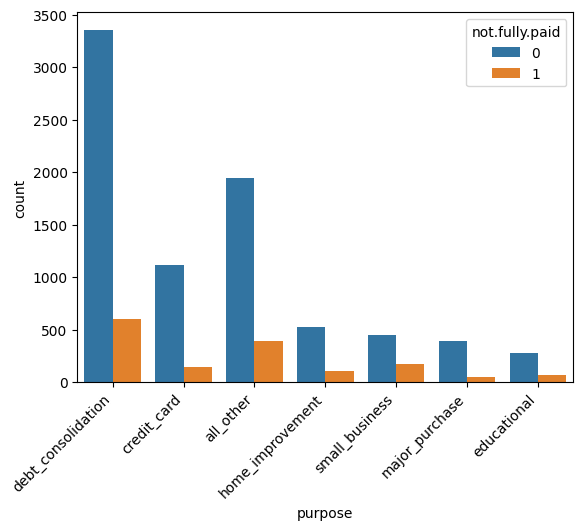

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='purpose', hue='not.fully.paid')
plt.xticks(rotation=45, ha='right')

In [52]:
### Data Preprocessing

pre_df = pd.get_dummies(df, columns=['purpose'], drop_first=True)
pre_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


In [53]:
from sklearn.model_selection import train_test_split

X = pre_df.drop('not.fully.paid', axis=1)
y = pre_df['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)

In [54]:
### Model Building and Training

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [55]:
### Model Evaluation

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print("Accuracty:", accuracy)
print("F1 score:", f1)

Accuracty: 0.8206263840556786
F1 score: 0.8686606980013266


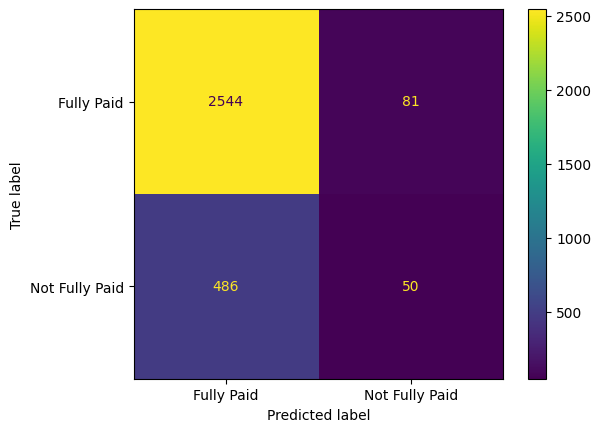

In [56]:
labels = ["Fully Paid", "Not Fully Paid"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();